# Проект: Динамика популяции


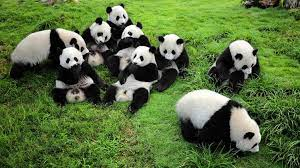

Рассмотрим, систему ОДУ, описывающую изменение численности популяций двух видов (x,y) и эволюцию генетических признаков(a1, a2):

\begin{equation*}
    \begin{cases}
        x'=x(2a_{1}-0.5x-\frac{y a_{1}^2}{a_{2}^2})\\
        y'=y(2a_{2}-0.5y-\frac{x}{a_{2}^{2}a_{1}^{2}})\\
        a'_{1}=2 \epsilon (1-\frac{a_{1} y}{a_{2}^2})\\
        a'_{1}=2 \epsilon (1-\frac{a_{2} x}{a_{1}^2})
     \end{cases}
\end{equation*}

В нашем случае $\epsilon$ = 0.00001

Зададим начальные условия системы
$$x0 = 0.001$$
$$y0 = 1$$
$$a_10 = 0.001$$
$$a_20 = 10$$

Исследуем изменения двух видов в зависимости от времени t, используя  метод Рунге-Кутты: 

## Исследование изменений характеристик со временем

In [306]:
import numpy as np
import matplotlib.pyplot as plt


In [354]:
def der_x(x, y, a1, a2):
    return x*(2*a1-0.5*x-y*a1**2/a2**2)

In [355]:
def der_y(x, y, a1, a2):
    return y*(2*a2-0.5*y-x/a1**2/a2**2)

In [356]:
def der_a1(y, a1, a2):
    return 2*0.00001*(1-a1*y/a2**2)

In [357]:
def der_a2(x, a1, a2):
    return 2*0.00001*(1-a2*x/a1**2)

In [359]:
def explicit_runge_kutta_4(t0, x0, y0, a10, a20, t1, tau):
# Реализация явного методы Рунге-Кутты 4-го порядка точности
    n = int((t1 - t0) / tau) 
    t = np.zeros(n + 1)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    a1 = np.zeros(n + 1)
    a2 = np.zeros(n + 1)
    t[0] = t0
    x[0] = x0
    y[0] = y0
    a1[0] = a10
    a2[0] = a20
    for i in range(n):
        k1_x = der_x(x[i], y[i], a1[i], a2[i])
        k1_y = der_y(x[i], y[i], a1[i], a2[i])
        k1_a1 = der_a1(x[i], a1[i], a2[i])
        k1_a2 = der_a2(x[i], a2[i], a2[i])
        
        k2_x = der_x(x[i] + tau * k1_x / 2, y[i] + tau * k1_y / 2, a1[i] + tau * k1_a1 / 2, a2[i] + tau * k1_a2 / 2)
        k2_y = der_y(x[i] + tau * k1_x / 2, y[i] + tau * k1_y / 2, a1[i] + tau * k1_a1 / 2, a2[i] + tau * k1_a2 / 2)
        k2_a1 = der_a1(                     y[i] + tau * k1_y / 2, a1[i] + tau * k1_a1 / 2, a2[i] + tau * k1_a2 / 2)
        k2_a2 = der_a2(x[i] + tau * k1_x / 2,                      a1[i] + tau * k1_a1 / 2, a2[i] + tau * k1_a2 / 2)
        
        k3_x = der_x(x[i] + tau * k2_x / 2, y[i] + tau * k2_y / 2, a1[i] + tau * k2_a1 / 2, a2[i] + tau * k2_a2 / 2)
        k3_y = der_y(x[i] + tau * k2_x / 2, y[i] + tau * k2_y / 2, a1[i] + tau * k2_a1 / 2, a2[i] + tau * k2_a2 / 2)
        k3_a1 = der_a1(                     y[i] + tau * k2_y / 2, a1[i] + tau * k2_a1 / 2, a2[i] + tau * k2_a2 / 2)
        k3_a2 = der_a2(x[i] + tau * k2_x / 2,                      a1[i] + tau * k2_a1 / 2, a2[i] + tau * k2_a2 / 2)
        
        k4_x = der_x(x[i] + tau * k3_x, y[i] + tau * k3_y, a1[i] + tau * k3_a1, a2[i] + tau * k3_a2)
        k4_y = der_y(x[i] + tau * k3_x, y[i] + tau * k3_y, a1[i] + tau * k3_a1, a2[i] + tau * k3_a2)
        k4_a1 = der_a1(                 y[i] + tau * k3_y, a1[i] + tau * k3_a1, a2[i] + tau * k3_a2)
        k4_a2 = der_a2(x[i] + tau * k3_x,                  a1[i] + tau * k3_a1, a2[i] + tau * k3_a2)
        
        t[i + 1] = t[i] + tau
        x[i + 1] = x[i] + tau * (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
        y[i + 1] = y[i] + tau * (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6
        a1[i + 1] = a1[i] + tau * (k1_a1 + 2 * k2_a1 + 2 * k3_a1 + k4_a1) / 6
        a2[i + 1] = a2[i] + tau * (k1_a2 + 2 * k2_a2 + 2 * k3_a2 + k4_a2) / 6
    return t, x, y, a1, a2



In [343]:
def explicit_runge_kutta_2(t0, x0, y0, a10, a20, t1, tau):
    n = int((t1 - t0) / tau) 
    t = np.zeros(n + 1)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    a1 = np.zeros(n + 1)
    a2 = np.zeros(n + 1)
    t[0] = t0
    x[0] = x0
    y[0] = y0
    a1[0] = a10
    a2[0] = a20
    for i in range(n):
        k1_x = der_x(x[i], y[i], a1[i], a2[i])
        k1_y = der_y(x[i], y[i], a1[i], a2[i])
        k1_a1 = der_a1(x[i], a1[i], a2[i])
        k1_a2 = der_a2(x[i], a2[i], a2[i])
        
        k2_x = der_x(x[i] + tau * k1_x / 2, y[i] + tau * k1_y / 2, a1[i] + tau * k1_a1 / 2, a2[i] + tau * k1_a2 / 2)
        k2_y = der_y(x[i] + tau * k1_x / 2, y[i] + tau * k1_y / 2, a1[i] + tau * k1_a1 / 2, a2[i] + tau * k1_a2 / 2)
        k2_a1 = der_a1(                     y[i] + tau * k1_y / 2, a1[i] + tau * k1_a1 / 2, a2[i] + tau * k1_a2 / 2)
        k2_a2 = der_a2(x[i] + tau * k1_x / 2,                      a1[i] + tau * k1_a1 / 2, a2[i] + tau * k1_a2 / 2)
        
        t[i + 1] = t[i] + tau
        x[i + 1] = x[i] + tau * k2_x
        y[i + 1] = y[i] + tau * k2_y
        a1[i + 1] = a1[i] + tau * k2_a1
        a2[i + 1] = a2[i] + tau * k2_a2
    return t, x, y, a1, a2

In [379]:
def implicit_runge_kutta_2(t0, x0, y0, a10, a20, t1, tau):
    n = int((t1 - t0) / tau) 
    t = np.zeros(n + 1)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    a1 = np.zeros(n + 1)
    a2 = np.zeros(n + 1)
    t[0] = t0
    x[0] = x0
    y[0] = y0
    a1[0] = a10
    a2[0] = a20
    for i in range(n):
        k1_x = der_x(x[i], y[i], a1[i], a2[i])
        k1_y = der_y(x[i], y[i], a1[i], a2[i])
        k1_a1 = der_a1(x[i], a1[i], a2[i])
        k1_a2 = der_a2(x[i], a2[i], a2[i])
        
        
        k2_x = der_x(x[i] + tau * k1_x, y[i] + tau * k1_y, a1[i] + tau * k1_a1, a2[i] + tau * k1_a2)
        k2_y = der_y(x[i] + tau * k1_x, y[i] + tau * k1_y, a1[i] + tau * k1_a1, a2[i] + tau * k1_a2)
        k2_a1 = der_a1(                 y[i] + tau * k1_y, a1[i] + tau * k1_a1, a2[i] + tau * k1_a2)
        k2_a2 = der_a2(x[i] + tau * k1_x,                  a1[i] + tau * k1_a1, a2[i] + tau * k1_a2)
        
        t[i + 1] = t[i] + tau
        x[i + 1] = x[i] + tau * (k1_x + k2_x)/2
        y[i + 1] = y[i] + tau * (k1_y + k2_y)/2
        a1[i + 1] = a1[i] + tau * (k1_a1 + k2_a1)/2
        a2[i + 1] = a2[i] + tau * (k1_a2 + k2_a2)/2
    return t, x, y, a1, a2

In [426]:
t0 = 0
x0 = 0.001
y0 = 1
a10 = 0.001
a20 = 10
t1 = 4
tau = 0.01


In [427]:
t_1, x_1, y_1, a1_1, a2_1 = explicit_runge_kutta_4(t0, x0, y0, a10, a20, t1, tau)

In [428]:
t_2, x_2, y_2, a1_2, a2_1 = explicit_runge_kutta_2(t0, x0, y0, a10, a20, t1, tau)

In [429]:
t_3, x_3, y_3, a1_3, a2_3 = implicit_runge_kutta_2(t0, x0, y0, a10, a20, t1, tau)

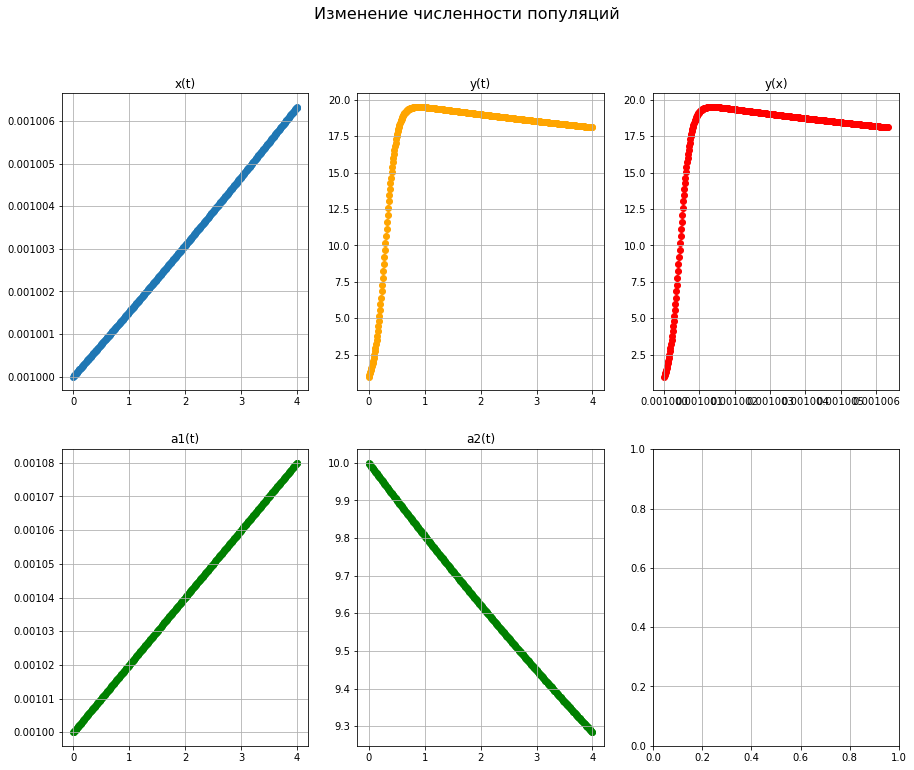

In [438]:
fig, axs = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle('Соотношения между характеристиками', fontsize=16)
axs[0, 0].scatter(t_1, x_1)
axs[0, 0].set_title('x(t)')
axs[0, 1].scatter(t_1, y_1, c='orange')
axs[0, 1].set_title('y(t)')
axs[0, 2].scatter(x_1, y_1, c='red')
axs[0, 2].set_title('y(x)')
axs[1, 0].scatter(t_1, a1_1, c='green')
axs[1, 0].set_title('a1(t)')
axs[1, 1].scatter(t_1, a2_1, c='green')
axs[1, 1].set_title('a2(t)')


for ax in axs.flat:
    ax.grid()

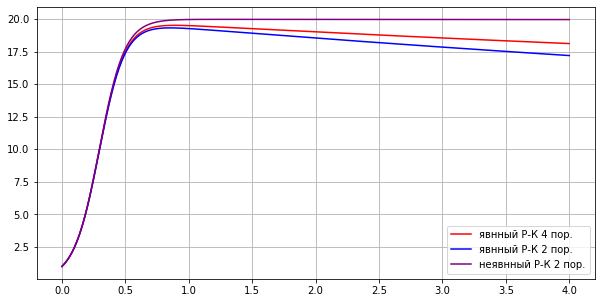

In [436]:
plt.figure(figsize=(10, 5))
 
plt.plot(t_1, y_1, 'red', label='явнный Р-К 4 пор.')
plt.plot(t_2, y_2, 'blue', label='явнный Р-К 2 пор.') 
plt.plot(t_3, y_3, 'purple', label='неявнный Р-К 2 пор.')
plt.legend()
plt.grid()
plt.show()

## Исследование разностных схем на сходимость.

Поскольку исходная задача не заранее известного точного решения, будем исследовании сходимость, вычисляя относительную погрешность численных решений между друг другом для случаев сеток с различным разбиением. 

Для удобства введем обозначения:
метод 1 - явный метод Рунге-Кутты 4-го порядка,
метод 2 - явный метод Рунге-Кутты 2-го порядка,
метод 3 - неявный метод Рунге-Кутты 2-го порядка

In [474]:
t0 = 0
x0 = 0.01
y0 = 1
a10 = 0.1
a20 = 10
t1 = 3


In [487]:
def find_error(tau):
    t_1, x_1, y_1, a1_1, a2_1 = explicit_runge_kutta_4(t0, x0, y0, a10, a20, t1, tau)
    t_2, x_2, y_2, a1_2, a2_2 = explicit_runge_kutta_2(t0, x0, y0, a10, a20, t1, tau)
    t_3, x_3, y_3, a1_3, a2_3 = implicit_runge_kutta_2(t0, x0, y0, a10, a20, t1, tau)
    diff_x_1 = np.amax(np.abs(x_1-x_2))
    diff_x_2 = np.amax(np.abs(x_1-x_3))
    diff_x_3 = np.amax(np.abs(x_2-x_3))
    diff_y_1 = np.amax(np.abs(y_1-y_2))
    diff_y_2 = np.amax(np.abs(y_1-y_3))
    diff_y_3 = np.amax(np.abs(y_2-y_3))
    return diff_x_1, diff_x_2, diff_x_3, diff_y_1, diff_y_2, diff_y_3

In [488]:
steps = np.arange(0.00001, 0.1, 0.00005)
err_x_1, err_x_2, err_x_3, err_y_1, err_y_2, err_y_3 = np.zeros(steps.size), np.zeros(steps.size), np.zeros(steps.size), np.zeros(steps.size), np.zeros(steps.size), np.zeros(steps.size)

for i, tau in enumerate(steps):
    err_x_1[i], err_x_2[i], err_x_3[i], err_y_1[i], err_y_2[i], err_y_3[i] = find_error(tau)
    

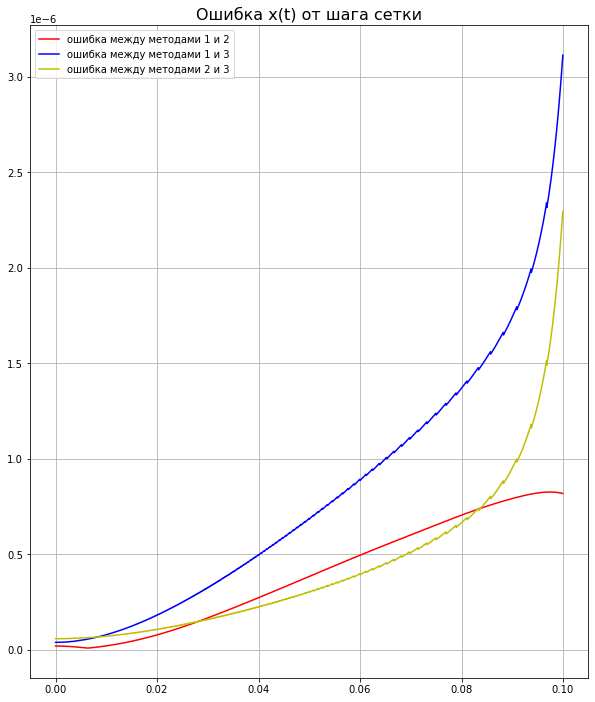

In [489]:
plt.figure(figsize=(10, 12))
plt.title('Ошибка x(t) от шага сетки', fontsize=16)
plt.plot(steps, err_x_1, 'r', label='ошибка между методами 1 и 2')
plt.plot(steps, err_x_2, 'b', label='ошибка между методами 1 и 3')
plt.plot(steps, err_x_3, 'y', label='ошибка между методами 2 и 3')
plt.legend()
plt.grid()
plt.show()

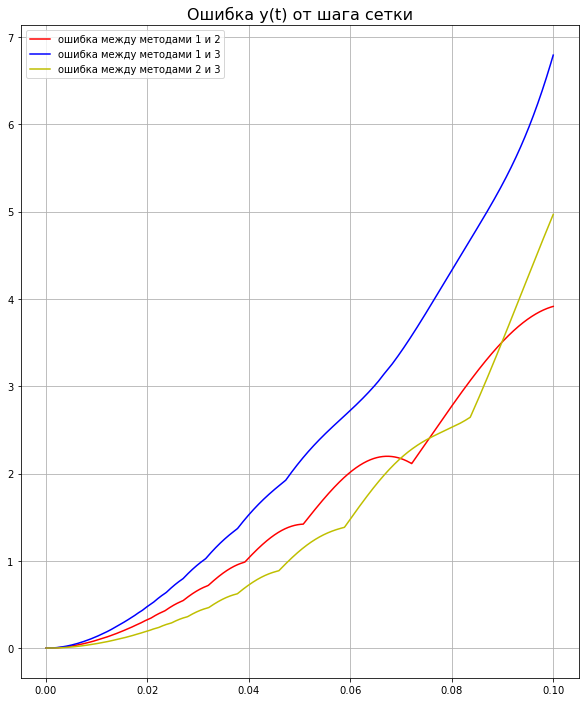

In [490]:
plt.figure(figsize=(10, 12))
plt.title('Ошибка y(t) от шага сетки', fontsize=16)
plt.plot(steps, err_y_1, 'r', label='ошибка между методами 1 и 2')
plt.plot(steps, err_y_2, 'b', label='ошибка между методами 1 и 3')
plt.plot(steps, err_y_3, 'y', label='ошибка между методами 2 и 3')
plt.legend()
plt.grid()
plt.show()

 Как можно видеть, для обоих характеристи x и у, при увеличении разбиения сетки погрешность уменьшается, что говорит о сходимости